### Árbol de Decisión modelo de Clasificación en Scikit-Learn - Titanic

In [74]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import sklearn 
titanic = pd.read_csv("./Titanic2.csv", sep = ",")

In [75]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [76]:
titanic.shape

(714, 6)

In [77]:
#Separación en Train y Test
X = titanic.drop("Survived", axis=1)
y = titanic.Survived

In [78]:
from sklearn.model_selection import train_test_split 

#Train y Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [79]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier 
arbol_de_decision = DecisionTreeClassifier(random_state = 42) 

In [82]:
param_grid = [
  {'max_depth': [3,4,5,6], 'min_samples_split': [2,3, 5,10, 20]} ]

In [84]:
clf =  GridSearchCV(arbol_de_decision, param_grid)


In [85]:
clf.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [3, 4, 5, 6],
                          'min_samples_split': [2, 3, 5, 10, 20]}])

In [86]:
clf.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [87]:
arbol_de_decision = DecisionTreeClassifier(max_depth=clf.best_params_['max_depth'],
                                           min_samples_split =clf.best_params_['min_samples_split'],
                                           random_state = 42) 

In [91]:
#Fit
clf.fit(X_train,y_train) #Entrenamos el modelo

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [3, 4, 5, 6],
                          'min_samples_split': [2, 3, 5, 10, 20]}])

In [92]:
#Prediccion
y_test_pred = clf.predict(X_test)

A lo largo de este notebook, se solicita calcular las métricas requeridas como así también su correspondiente interpretación: 

1. Calcular la métrica Accuracy.

In [93]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7674418604651163


2. Crear la Matriz de Confusión

[[102  24]
 [ 26  63]]


/home/anthony/tutorias_anthony/tutorias_data_science/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


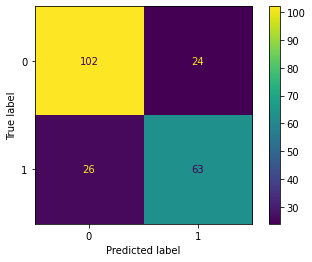

In [96]:
#Matriz de Confusión
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(arbol_de_decision, X_test, y_test)
plt.show()

3. Calcular la métrica Precision

In [98]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, y_test_pred)}")

Precision Score of the classifier is: 0.7241379310344828


4. Calcular la métrica Recall

In [100]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score of the classifier is: {recall_score(y_test, y_test_pred)}")

Recall Score of the classifier is: 0.7078651685393258


5. Calcular la métrica F1 score

In [101]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

F1 Score of the classifier is: 0.7159090909090908
